In [353]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import combinations
from collections import Counter

#1.	Load the sales datasets & concatenate them into one dataframe 


In [354]:
sale_data1=pd.read_csv('sales_data_part1.csv')
sale_data2=pd.read_csv('sales_data_part2.csv')
customers = pd.read_csv('customers.csv')

sale_dataM=pd.concat([sale_data1,sale_data2],axis=0,ignore_index=True)
sale_dataM.head(3)

,Order_ID,Date,Customer_ID,Country_Code,Channel,Sales_person,Units_Sold,Unit_Price,Product_Code,Product,Promotion_Flag,Commission_Percent
0,ORD0000001,2022-01-14,CUSTJ00001,JO,Online,ahmed,1,925.33,EB01,Laptop,0,0.03
1,ORD0000002,2021-12-21,CUSTJ00002,JO,offline,Sara,5,161.18,EG02,Gaming Chair,0,0.05
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,Offline,Ahmed,3,4.94,E05,Cable,0,0.05


#2.	Rename all column names to snake_case format 


In [355]:
sale_dataM.columns=sale_dataM.columns.str.lower()
print(list(sale_dataM.columns))

['order_id', 'date', 'customer_id', 'country_code', 'channel', 'sales_person', 'units_sold', 'unit_price', 'product_code', 'product', 'promotion_flag', 'commission_percent']


#3.	Standardize text data, fill missing data with ‘unknown’


In [356]:
sale_dataM.isnull().sum()

order_id              0
date                  0
customer_id           0
country_code          0
channel               5
sales_person          0
units_sold            0
unit_price            0
product_code          0
product               0
promotion_flag        0
commission_percent    0
dtype: int64

In [357]:
sale_dataM['channel']=sale_dataM['channel'].fillna('unknown')
sale_dataM.isnull().sum()

order_id              0
date                  0
customer_id           0
country_code          0
channel               0
sales_person          0
units_sold            0
unit_price            0
product_code          0
product               0
promotion_flag        0
commission_percent    0
dtype: int64

In [358]:
sale_dataM.loc[:, "channel"] = sale_dataM["channel"].str.strip().str.lower()

channel_mapping = {
    "website": "online",
    "online": "online",
    "in-store": "offline",
    "offline": "offline"
}

sale_dataM.loc[:, "channel"] = sale_dataM["channel"].map(channel_mapping)
sale_dataM.loc[0:20, "channel"]


0      online
1     offline
2     offline
3      online
4      online
5      online
6     offline
7      online
8     offline
9     offline
10     online
11     online
12    offline
13     online
14     online
15    offline
16    offline
17     online
18     online
19     online
20    offline
Name: channel, dtype: object

4.	Duplicate Records

In [359]:
#Identify all duplicate records in the dataset
sale_dataM.duplicated().sum()

15

In [360]:
#Store duplicate records in a separate DataFrame for investigation
df_dup=sale_dataM[sale_dataM.duplicated()]
df_dup



,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent
9147,ORD0001832,2023-05-11,CUSTJ00226,Jordn,offline,Ahmed,1,907.00,EB01,Laptop,0,0.02
9148,ORD0006503,2024-06-11,CUSTL00255,LEB,online,Lina,3,27.97,A01,Accessory,0,0.03
9149,ORD0000664,2025-03-10,CUSTJ00089,Jordan,offline,Rami,3,6.24,E05,Cable,0,0.05
9150,ORD0003191,2022-03-02,CUSTJ00407,JO,online,rami,3,47.69,EG03,Headset,0,0.02
9151,ORD0003191,2022-03-02,CUSTJ00407,JO,online,rami,3,47.69,EG03,Headset,0,0.02
9152,ORD0006564,2022-08-18,CUSTL00261,LEBANON,online,Lina,3,351.50,P02,Tablet,0,0.03
9153,ORD0006564,2022-08-18,CUSTL00261,LEBANON,online,Lina,3,351.50,P02,Tablet,0,0.03
9154,ORD0003316,2023-08-23,CUSTJ00410,Jor,online,ali,1,162.98,M01,Monitor,0,0.05
9155,ORD0007735,2023-06-26,CUSTL00406,LEBN,online,Sami,1,27.08,A01,Accessory,0,0.05
9156,ORD0004398,2021-10-21,CUSTL00033,LEBANON,online,Sami,4,32.13,A01,Accessory,0,0.03


In [361]:
df_dup.to_csv('duplicates.csv', index=False)

In [362]:
#Remove duplicate entries from the main dataset (keep first occurrence)
sale_dataM = sale_dataM.drop_duplicates(keep='first')

In [363]:
#6 Convert data types(ensure dates are datetime, numeric columns are numeric)

#sale_dataM.dtypes #check
sale_dataM['date']=pd.to_datetime(sale_dataM['date'])
print(sale_dataM['date'].dtypes) 

datetime64[ns]


In [364]:
numeric_cols = sale_dataM.select_dtypes(include='number').columns

for col in numeric_cols:
    sale_dataM[col] = pd.to_numeric(sale_dataM[col], errors='coerce')

print(sale_dataM[numeric_cols].dtypes) 


units_sold              int64
unit_price            float64
promotion_flag          int64
commission_percent    float64
dtype: object


feature_engineering

In [365]:
sale_dataM['country_code'].unique()

array(['JO', 'Jordan', 'Jordn', 'Jor', 'LEB', 'LEBN', 'LEBANON'],
      dtype=object)

In [366]:
#Standardized country codes

country_map={'JO': 'Jordan', 'Jor': 'Jordan', 
             'Jordn':'Jordan','Jordan':'Jordan',
'LEB': 'Lebanon', 'LEBN': 'Lebanon','LEBANON':'Lebanon'}

sale_dataM['country']= sale_dataM['country_code'].map(country_map)
sale_dataM.tail(2)

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent,country
9145,ORD0008480,2023-09-17,CUSTL00499,LEBN,online,sami,4,24.460000,E02,Mouse,0,0.05,Lebanon
9146,ORD0008481,2024-10-27,CUSTL00500,LEBANON,online,Ali,0,1379.238585,EB01,Laptop,0,0.05,Lebanon


#Convert all prices to consistent currency (USD)


In [367]:
def convert_price(row):
    if row['country'] == 'Jordan':
        return row['unit_price'] * 1.41
    elif row['country'] == 'Lebanon':
        return row['unit_price']
    else:
        return None # ??

sale_dataM['unit_price_usd'] = sale_dataM.apply(convert_price, axis=1)

In [368]:
sale_dataM.head(3)

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent,country,unit_price_usd
0,ORD0000001,2022-01-14,CUSTJ00001,JO,online,ahmed,1,925.33,EB01,Laptop,0,0.03,Jordan,1304.7153
1,ORD0000002,2021-12-21,CUSTJ00002,JO,offline,Sara,5,161.18,EG02,Gaming Chair,0,0.05,Jordan,227.2638
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,Ahmed,3,4.94,E05,Cable,0,0.05,Jordan,6.9654


#Customer discount percentage


In [369]:
sale_dataM['discount_pct'] = sale_dataM['units_sold'].apply(lambda x: 10 if x > 5 else 0)

sale_dataM[['discount_pct']]

,discount_pct
0,0
1,0
2,0
3,0
4,0
...,...
9142,0
9143,0
9144,0
9145,0


Total product value after discount

In [370]:
sale_dataM['total_amount'] = (
    sale_dataM['units_sold'] 
    * sale_dataM['unit_price_usd'] 
    * (1 - sale_dataM['discount_pct'] / 100)
)

sale_dataM[['total_amount']]

,total_amount
0,1304.7153
1,1136.3190
2,20.8962
3,216.6183
4,672.8238
...,...
9142,258.8700
9143,882.8400
9144,463.8200
9145,97.8400


Sales commission earned

In [371]:
sale_dataM['commission_amount'] = sale_dataM['total_amount'] * (sale_dataM['commission_percent'] )
sale_dataM[['commission_amount']]

,commission_amount
0,39.141459
1,56.815950
2,1.044810
3,4.332366
4,33.641190
...,...
9142,7.766100
9143,44.142000
9144,23.191000
9145,4.892000


Date components

In [372]:
sale_dataM['year'] = sale_dataM['date'].dt.year
sale_dataM['month'] = sale_dataM['date'].dt.month
sale_dataM['weekday_name'] = sale_dataM['date'].dt.day_name()
sale_dataM.head(22)

,order_id,date,customer_id,country_code,channel,sales_person,units_sold,unit_price,product_code,product,promotion_flag,commission_percent,country,unit_price_usd,discount_pct,total_amount,commission_amount,year,month,weekday_name
0,ORD0000001,2022-01-14,CUSTJ00001,JO,online,ahmed,1,925.33,EB01,Laptop,0,0.03,Jordan,1304.7153,0,1304.7153,39.141459,2022,1,Friday
1,ORD0000002,2021-12-21,CUSTJ00002,JO,offline,Sara,5,161.18,EG02,Gaming Chair,0,0.05,Jordan,227.2638,0,1136.3190,56.815950,2021,12,Tuesday
2,ORD0000003,2021-12-10,CUSTJ00002,Jordan,offline,Ahmed,3,4.94,E05,Cable,0,0.05,Jordan,6.9654,0,20.8962,1.044810,2021,12,Friday
3,ORD0000004,2022-02-21,CUSTJ00002,Jordn,online,Ahmed,3,51.21,EG03,Headset,0,0.02,Jordan,72.2061,0,216.6183,4.332366,2022,2,Monday
4,ORD0000005,2021-01-14,CUSTJ00002,Jordn,online,rami,2,238.59,P02,Tablet,0,0.05,Jordan,336.4119,0,672.8238,33.641190,2021,1,Thursday
5,ORD0000006,2025-05-19,CUSTJ00002,Jordn,online,Ahmed,3,48.64,EG03,Headset,0,0.02,Jordan,68.5824,0,205.7472,4.114944,2025,5,Monday
6,ORD0000007,2022-09-18,CUSTJ00002,Jordan,offline,Ahmed,4,5.79,E05,Cable,0,0.03,Jordan,8.1639,0,32.6556,0.979668,2022,9,Sunday
7,ORD0000008,2021-05-29,CUSTJ00002,Jordan,online,ahmed,4,6.25,E05,Cable,0,0.03,Jordan,8.8125,0,35.2500,1.057500,2021,5,Saturday
8,ORD0000009,2021-08-05,CUSTJ00002,JO,offline,Sara,2,5.72,E05,Cable,0,0.02,Jordan,8.0652,0,16.1304,0.322608,2021,8,Thursday
9,ORD0000010,2021-03-11,CUSTJ00002,JO,offline,Rami,3,157.18,EG02,Gaming Chair,0,0.05,Jordan,221.6238,0,664.8714,33.243570,2021,3,Thursday


sales_volume_category

In [373]:
sale_dataM['sales_volume_category'] = sale_dataM['units_sold'].apply(
    lambda x: 'High' if x >= 5 else ('Medium' if 3 <= x <= 4 else 'Low')
)
sale_dataM[['sales_volume_category']]

,sales_volume_category
0,Low
1,High
2,Medium
3,Medium
4,Low
...,...
9142,Low
9143,Medium
9144,Low
9145,Medium


Customer loyalty tier

In [374]:
customer_orders = sale_dataM.groupby('customer_id')['order_id'].nunique()

sale_dataM['total_orders'] = sale_dataM['customer_id'].map(customer_orders)

sale_dataM['customer_segment'] = sale_dataM['total_orders'].apply(
    lambda x: 'Loyal' if x >= 50 else ('Premium' if 10 <= x <= 49 else ('Standard' if 2 <= x <= 9 else 'One-time'))
)

sale_dataM[['customer_id', 'total_orders', 'customer_segment']].head()

,customer_id,total_orders,customer_segment
0,CUSTJ00001,1,One-time
1,CUSTJ00002,9,Standard
2,CUSTJ00002,9,Standard
3,CUSTJ00002,9,Standard
4,CUSTJ00002,9,Standard


Business Questions 

In [375]:
print("1- How many transactions occurred in each sales channel?") 
sale_dataM['channel'].value_counts()

1- How many transactions occurred in each sales channel?


channel
online     6513
offline    2629
Name: count, dtype: int64

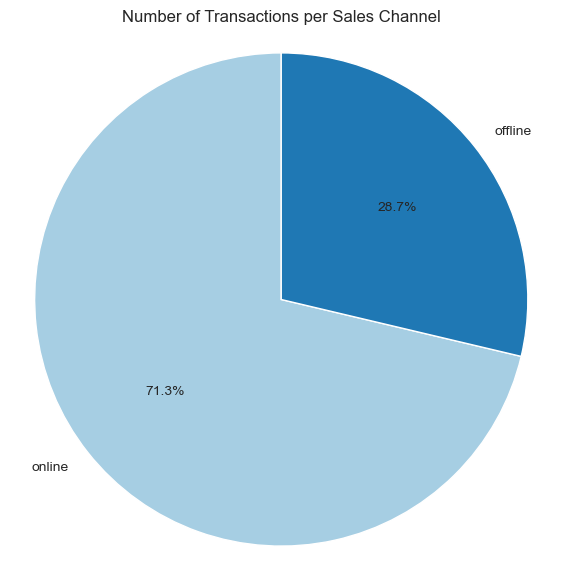

In [376]:

transactions_per_channel = sale_dataM.groupby('channel')['order_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(7,7))
plt.pie(transactions_per_channel, labels=transactions_per_channel.index,
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Number of Transactions per Sales Channel")
plt.axis('equal')
plt.show()



In [377]:
print("2- How many transactions involve each product? ") 
sale_dataM['product_code'].value_counts()


2- How many transactions involve each product? 


product_code
E04     1154
F02      989
EG02     871
E05      793
EG03     789
P02      783
M01      773
P01      772
E02      765
A01      764
EB01     694
Name: count, dtype: int64

In [378]:
print("3- What is the average (mean) unit price across all products?") 
sale_dataM['unit_price'].mean()

3- What is the average (mean) unit price across all products?


209.97501531601017

In [379]:
print('4- What is the maximum number of units sold in a single transaction?')
sale_dataM['units_sold'].max()

4- What is the maximum number of units sold in a single transaction?


10

In [380]:
print('5- What is the minimum unit price in the dataset?')
sale_dataM['unit_price'].min()

5- What is the minimum unit price in the dataset?


4.41

In [381]:
print('6- How many sales transactions had a discount?')
(sale_dataM['discount_pct']>0).sum()

6- How many sales transactions had a discount?


126

In [382]:
print('7- How many unique orders are there?')
sale_dataM['order_id'].nunique()


7- How many unique orders are there?


8481

In [383]:
print('8- How many customers in each segment?')

unique_customers = sale_dataM[['customer_id', 'customer_segment']].drop_duplicates()
segment_counts = unique_customers['customer_segment'].value_counts()
print(segment_counts)


8- How many customers in each segment?
customer_segment
One-time    500
Standard    350
Premium     100
Loyal        50
Name: count, dtype: int64


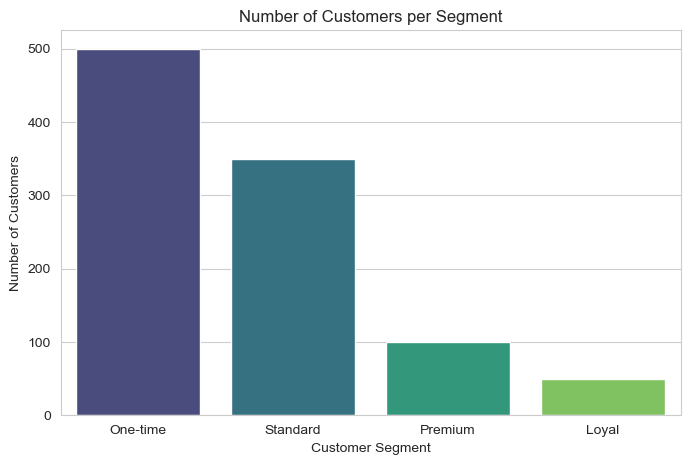

In [384]:
plt.figure(figsize=(8,5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.title("Number of Customers per Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

In [385]:
print('9- In 2024, which day of the week had the highest sales amount?')
sale_dataM_2024 = sale_dataM[sale_dataM['date'].dt.year == 2024]
sales_per_day = sale_dataM_2024.groupby('weekday_name')['total_amount'].sum()
top_day = sales_per_day.idxmax()
top_day


9- In 2024, which day of the week had the highest sales amount?


'Tuesday'

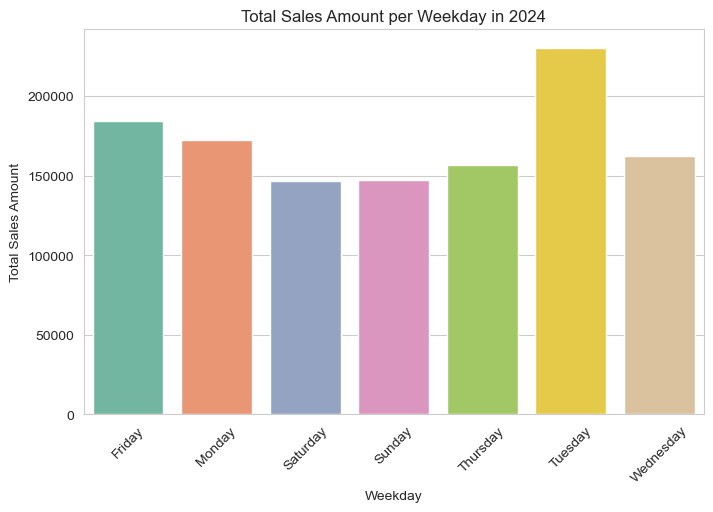

In [386]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=sales_per_day.index,
    y=sales_per_day.values,
    palette="Set2"  
)

plt.title("Total Sales Amount per Weekday in 2024")
plt.xlabel("Weekday")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

10- Identify all sales in 2024 from Jordan where the sales volume is categorized as 'High' and the products sold were not 'Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair'

In [387]:

excluded_product = ['Gaming Chair', 'Keyboard', 'Monitor', 'Tablet', 'Chair']
filtered_sales = sale_dataM[
    (sale_dataM['date'].dt.year == 2024) &
    (sale_dataM['country'] == 'Jordan') &
    (sale_dataM['sales_volume_category'] == 'High') &
    (~sale_dataM['product'].isin(excluded_product))
]
print('10-How many sales transactions are there?')
total_trans = filtered_sales.shape[0]
total_trans

10-How many sales transactions are there?


69

In [388]:
print('10-How many sales transactions with ‘Premium’ customer segment?')
prem_trans= filtered_sales[filtered_sales['customer_segment'] == 'Premium'].shape[0]
prem_trans

10-How many sales transactions with ‘Premium’ customer segment?


26

11- The company is considering closing one of its sales channels in one country due to high operating costs. Using the data, which country and channel combination has the lowest number of transactions, and might be the best candidate for closure?

In [389]:
summary= sale_dataM.groupby(['country', 'channel']).size()

lowest_trans= summary.idxmin()
lowest_count= summary.min()

print("Country & channel with lowest transactions:", lowest_trans)
print("Number of transactions:", lowest_count)


Country & channel with lowest transactions: ('Lebanon', 'offline')
Number of transactions: 466


In [390]:
print('12-a identify the dominant sector among the loyal customer segment:')
merged_sa_cust = pd.merge(sale_dataM, customers[['customer_id', 'sector', 'city']], on='customer_id', how='left')
loyal_sector = merged_sa_cust[merged_sa_cust['customer_segment']=='Loyal']['sector'].value_counts()
print("Dominant sector :", loyal_sector.index[0])

12-a identify the dominant sector among the loyal customer segment:
Dominant sector : university


In [391]:
print('12-b Which city has the highest total sales volume (units sold) in Jordan via the online channel? ')
jordan_online = merged_sa_cust[
    (merged_sa_cust['country_code']=='Jordan') &
    (merged_sa_cust['channel']=='online')
]

city_sales = jordan_online.groupby('city')['units_sold'].sum()
city_sorted = city_sales.sort_values(ascending=False)
print(city_sorted)


12-b Which city has the highest total sales volume (units sold) in Jordan via the online channel? 
city
Amman     1626
Irbid      975
Aqaba      199
Madaba     124
Karak      122
Zarqa       83
Name: units_sold, dtype: int64


13- Which products are most frequently sold together in the same order? List the top product pairs and how many times they occurred together?

In [ ]:

order_prod = sale_dataM.groupby('order_id')['product'].apply(list)

pair_counter = Counter()

for products in orders_products:
    unique_products = set(products)
    pairs = combinations(unique_products, 2)
    pair_counter.update(pairs)
    top_pairs = pair_counter.most_common(10)
print("Top product pairs sold together:")
for pair, count in top_pairs:
    print(pair, ":", count)


Top product pairs sold together:
('Keyboard', 'Mouse') : 383
('Laptop', 'Chair') : 182
('Headset', 'Gaming Chair') : 101


In [393]:

order_prod = sale_dataM.groupby('order_id')['product'].apply(list)
pair_counter = Counter()
for products in order_prod:
    unique_products = set(products)
    pairs = combinations(unique_products, 2)
    pair_counter.update(pairs)

top_pairs = pair_counter.most_common(10)

df_pairs = pd.DataFrame(top_pairs, columns=['Product Pair', 'Count'])
df_pairs['Product Pair'] = df_pairs['Product Pair'].apply(lambda x: f"{x[0]} & {x[1]}")

fig = px.bar(
    df_pairs[::-1], 
    x='Count',
    y='Product Pair',
    orientation='h',
    text='Count',
    title='Top 10 Product Pairs Sold Together',
    color='Count',
    color_continuous_scale='Viridis'
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


15-Which day of the week shows the highest sales for each product category? Create a heatmap showing sales volume by product and weekday?

In [394]:
sales_by_product_weekday = sale_dataM.groupby(['product','weekday_name'])['unit_price'].sum().unstack()
highest_day_per_product = sales_by_product_weekday.idxmax(axis=1).reset_index(name ="day")
highest_day_per_product

,product,day
0,Accessory,Thursday
1,Cable,Sunday
2,Chair,Saturday
3,Gaming Chair,Saturday
4,Headset,Saturday
5,Keyboard,Friday
6,Laptop,Tuesday
7,Monitor,Tuesday
8,Mouse,Tuesday
9,Phone,Tuesday


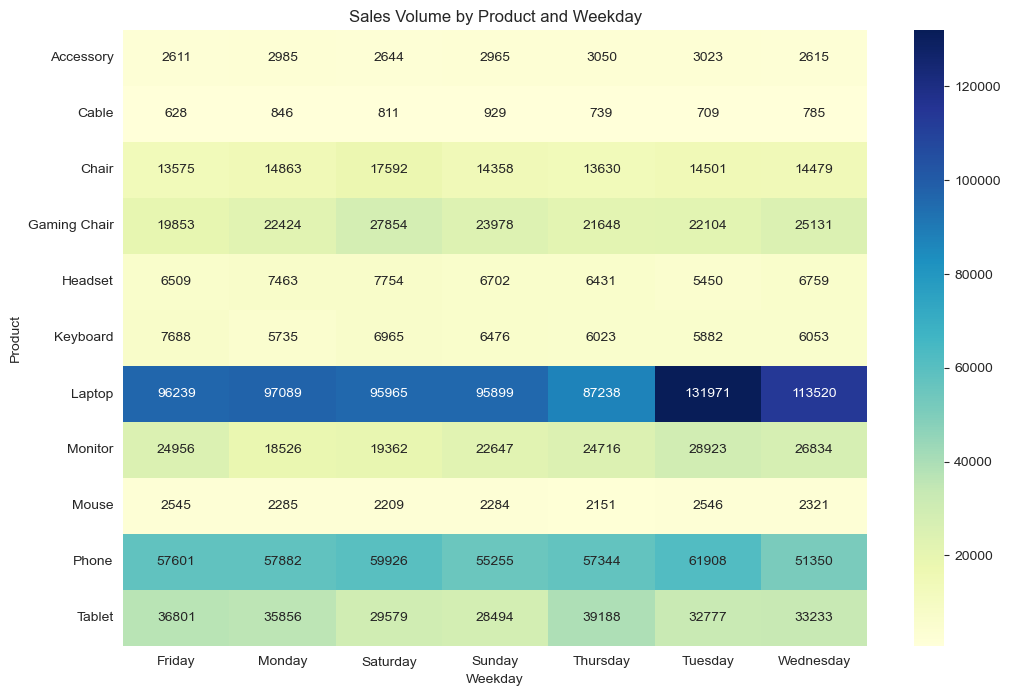

In [395]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_by_product_weekday, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Volume by Product and Weekday")
plt.ylabel("Product")
plt.xlabel("Weekday")
plt.show()

14- Compare weekday sales trends for Jordan vs. Lebanon. Which weekdays are most profitable in each country?

In [396]:
summary = (
    sale_dataM.groupby(["country","weekday_name"])["units_sold"]
         .sum().unstack(fill_value=0).agg(["idxmax","max"], axis=1))

summary



,idxmax,max
country,,
Jordan,Wednesday,1922
Lebanon,Saturday,1877


15- Find the top-performing salesperson per year (2022, 2023, 2024) based on total sales amount Show their total sales amount for each year 

In [397]:
filtered = sale_dataM[sale_dataM["year"].isin([2022, 2023, 2024])]

sales_year = (
    filtered.groupby(["year", "sales_person"])["total_amount"]
            .sum()
            .reset_index()
)

top = (
    sales_year.sort_values(["year", "total_amount"], ascending=[True, False])
                  .groupby("year")
                  .head(1)
)

top



,year,sales_person,total_amount
8,2022,lina,125568.673626
15,2023,Sami,134160.830673
22,2024,Ahmed,141840.001860


16- Which salesperson generated the highest commission over the period? Who generated the least?

In [398]:
summary=sale_dataM.groupby("sales_person")["commission_amount"].sum().reset_index()
sorted = summary.sort_values(by="commission_amount", ascending=False)
hihgest = sorted.iloc[0]
lowest = sorted.iloc[-1]

print("Sales_person with highest commission:", highest["sales_person"], "-", highest["commission_amount"])
print("Sales_person with lowest commission:", lowest["sales_person"], "-", lowest["commission_amount"])


Sales_person with highest commission: Sami - 17137.018882879514
Sales_person with lowest commission: Sara - 13573.4668302


17- Calculate the Year-over-Year (YoY) percentage change in sales for each country. Visualize the sales trends for all countries over the years. Based on your results, describe how each country is performing. Identify which country shows consistent growth, which is stable, and if any country shows declining trends.

In [399]:
sales = sale_dataM.groupby(["country", "year"])["total_amount"].sum().reset_index()
sales["YoY_change"] = sales.groupby("country")["total_amount"].pct_change() * 100
sales

,country,year,total_amount,YoY_change
0,Jordan,2021,609771.412950,NaN
1,Jordan,2022,596604.605940,-2.159302
2,Jordan,2023,622081.003410,4.270231
3,Jordan,2024,688462.200240,10.670828
4,Jordan,2025,346446.239730,-49.678248
5,Lebanon,2021,517423.028417,NaN
6,Lebanon,2022,561043.184012,8.430269
7,Lebanon,2023,581575.000895,3.659579
8,Lebanon,2024,511185.181441,-12.103309
9,Lebanon,2025,305532.980530,-40.230470


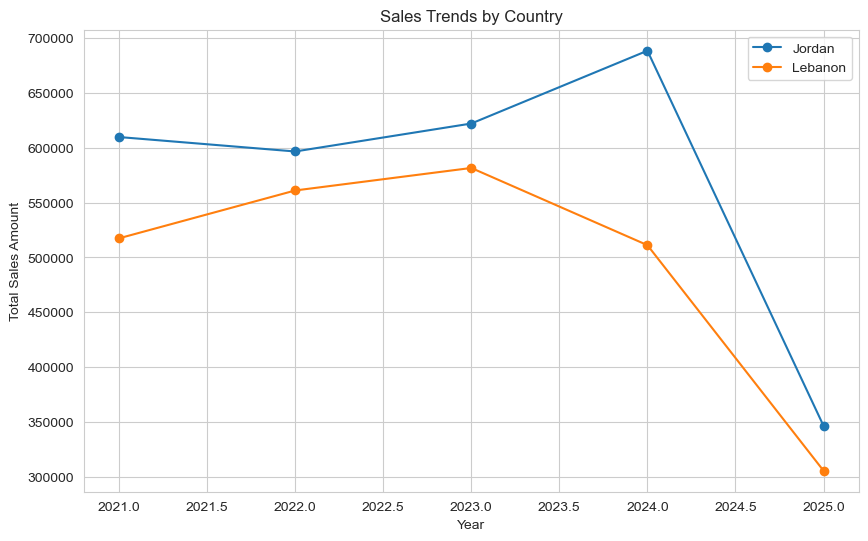

In [400]:
plt.figure(figsize=(10,6))

for country in sales["country"].unique():
    subset = sales[sales["country"] == country]
    plt.plot(subset["year"], subset["total_amount"], marker='o', label=country)

plt.title("Sales Trends by Country")
plt.xlabel("Year")
plt.ylabel("Total Sales Amount")
plt.legend()
plt.grid(True)
plt.show()


18- Create a monthly summary report for each product showing total sales revenue, number of transactions, and total units sold.

In [401]:
month = sale_dataM.groupby(['product', 'year', 'month']).agg(
    total_revenue=('total_amount', 'sum'),
    num_tran=('order_id', 'count'),
    total_units=('units_sold', 'sum')
).reset_index()
month

,product,year,month,total_revenue,num_tran,total_units
0,Accessory,2021,1,743.09740,9,25
1,Accessory,2021,2,772.72950,11,26
2,Accessory,2021,3,1197.37220,15,39
3,Accessory,2021,4,1632.80840,16,54
4,Accessory,2021,5,1215.75590,14,41
...,...,...,...,...,...,...
600,Tablet,2025,3,14256.37223,14,41
601,Tablet,2025,4,12975.50670,13,38
602,Tablet,2025,5,14990.21770,17,43
603,Tablet,2025,6,16604.84900,16,48


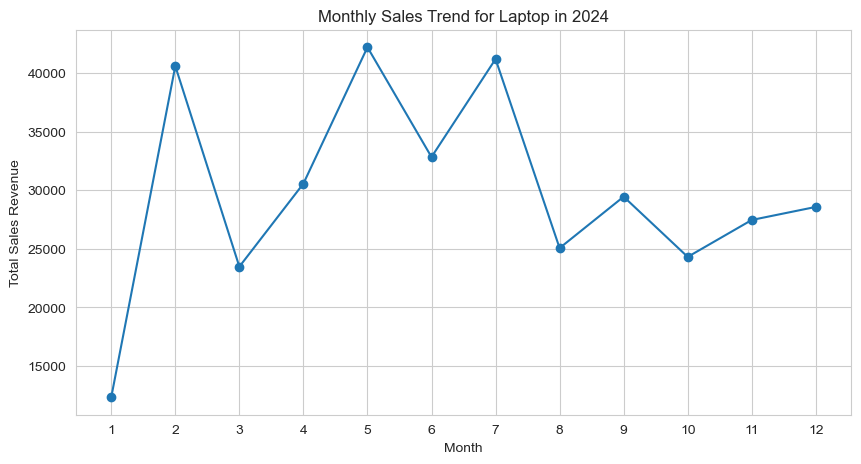

In [402]:

product = "Laptop"  
product_2024 = month[(month['product'] == product) & 
                               (month['year'] == 2024)]

plt.figure(figsize=(10,5))
plt.plot(product_2024['month'], product_2024['total_revenue'], marker='o')
plt.title(f"Monthly Sales Trend for {product} in 2024")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.xticks(range(1,13))  
plt.grid(True)
plt.show()


19- How many promotion periods were there? For each period, specify the month and year, and list the products included in the promotion?

In [403]:
promotions = sale_dataM[sale_dataM["promotion_flag"] == True]

promotion_periods = (
    promotions.groupby(["year","month"])["product"]
              .unique()  
              .reset_index()
)

promotion_periods["promotion_period"] = range(1, len(promotion_periods)+1)

print("Number of promotion periods:", len(promotion_periods))
promotion_periods


Number of promotion periods: 3


,year,month,product,promotion_period
0,2023,7,"[Laptop, Mouse, Keyboard, Chair]",1
1,2024,11,"[Headset, Gaming Chair]",2
2,2024,12,"[Gaming Chair, Headset]",3


 which promotion period increased, decreased, or had no effect on  sales of promotions products

In [404]:


promo_sales = sale_dataM[sale_dataM['promotion_flag'] == 1]

monthly_sales = sale_dataM.groupby(['year','month','product'])['units_sold'].sum().reset_index()

results = []

for _, row in promotion_periods.iterrows():
    y, m, products = row['year'], row['month'], row['product']
    
    prev = monthly_sales[(monthly_sales['year']==y) & (monthly_sales['month']==m-1) & (monthly_sales['product'].isin(products))]['units_sold'].sum()
    during = monthly_sales[(monthly_sales['year']==y) & (monthly_sales['month']==m) & (monthly_sales['product'].isin(products))]['units_sold'].sum()
    after = monthly_sales[(monthly_sales['year']==y) & (monthly_sales['month']==m+1) & (monthly_sales['product'].isin(products))]['units_sold'].sum()
    
    if during > prev:
        effect = "increased"
    elif during < prev:
        effect = "decreased"
    else:
        effect = "no effect"
        
    results.append({"year": y, "month": m, "effect": effect, "during_sales": during, "prev_sales": prev, "after_sales": after})

pd.DataFrame(results)


,year,month,effect,during_sales,prev_sales,after_sales
0,2023,7,decreased,155,207,151
1,2024,11,increased,89,51,105
2,2024,12,increased,105,89,0
